# 1. Introduction 


## Pytorch 
is commonly known as Deep Learning Library. But, it could be a scientific library that use the power of GPUs.

# 2. Basics

## 2.1 Matrices 

* In numpy or other programming language, we call a matrix or array to represent multi-dimentional data. But in Pytorch we simply call them <b>Tensors</b>

In [1]:
import numpy as np # import numpy 

arr = [[1,2,3],[4,5,6]]
np_arr = np.array(arr)
print("Array Type: {}".format(type(np_arr))) #type 
print("Array shape: {}".format(np.shape(np_arr))) #shape
print(np_arr)

Array Type: <class 'numpy.ndarray'>
Array shape: (2, 3)
[[1 2 3]
 [4 5 6]]


* We created numpy array with np.array() method 
* Type() is a function to know the variable type in python
* np.shape() is a function to know the shape of a numpy array 

In [2]:
import torch # import pytorch

tens = torch.Tensor(arr)
print("Array Type: {}".format(tens.type)) #type
print("Array Shape: {}".format(tens.shape)) #shape
print(tens)

Array Type: <built-in method type of Tensor object at 0x7f1d9f62d240>
Array Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


<b>We saw the different how to make array in numpy and pytorch</b>
* in Pytorch we use torch.Tensor() to create an array
* in Pytorch, tensor has a "shape" property shows the shape of the tensor

In [3]:
# numpy random
print("Numpy random array: \n {}\n".format(np.random.rand(2,3)))

# pytorch random
print("Pytorch random tensor: ")
print(torch.rand(2,3))

Numpy random array: 
 [[0.86005853 0.30428379 0.9943963 ]
 [0.64913646 0.77740985 0.05813002]]

Pytorch random tensor: 
tensor([[0.4404, 0.5932, 0.4258],
        [0.1478, 0.5191, 0.2552]])


<b>Numpy is quite mature library, it has lots of function on creating and manipulating array. But pytorch also catch up and try to adopt the habits of numpy/python developer.</b>



In [4]:
# create random numpy array 
arr = np.random.rand(2,3)
print("{} {}\n".format(type(arr),arr))
# from numpy to tensor
from_numpy_to_tensor = torch.from_numpy(arr)
print("{}\n".format(from_numpy_to_tensor))

<class 'numpy.ndarray'> [[0.56038992 0.55310796 0.91515807]
 [0.7637029  0.42926381 0.57868473]]

tensor([[0.5604, 0.5531, 0.9152],
        [0.7637, 0.4293, 0.5787]], dtype=torch.float64)



* first, we create random array numpy 
* we convert numpy array into tensor by using torch.from_numpy() function 

In [5]:
tens = from_numpy_to_tensor
from_tensor_to_numpy = tens.numpy()
print("{} {}\n".format(type(from_tensor_to_numpy),from_tensor_to_numpy))

<class 'numpy.ndarray'> [[0.56038992 0.55310796 0.91515807]
 [0.7637029  0.42926381 0.57868473]]



* Tensor has a function named .numpy() to convert tensor into numpy array

## 2.2 Basic Math

* Resize: view()
* a and b are tensor.
* Addition: torch.add(a,b) = a + b
* Subtraction: a.sub(b) = a - b
* Element wise multiplication: torch.mul(a,b) = a * b
* Element wise division: torch.div(a,b) = a / b
* Mean: a.mean()
* Standart Deviation (std): a.std()

In [6]:
# create tensor 
tensor = torch.ones(3,3)
print("Create a tensor with all 1s : \n",tensor)

# Resize
print("\n Reshape the tensor: \n {} \n {}\n".format(tensor.view(9).shape,tensor.view(9)))

# Addition
print("Addition: {}\n".format(torch.add(tensor,tensor)))

# Subtraction
print("Subtraction: {}\n".format(tensor.sub(tensor)))

# Element wise multiplication
print("Element wise multiplication: {}\n".format(torch.mul(tensor,tensor)))

# Element wise division
print("Element wise division: {}\n".format(torch.div(tensor,tensor)))

# Mean
tensor = torch.Tensor([1,2,3,4,5])
print("Mean: {}".format(tensor.mean()))

# Standart deviation (std)
print("std: {}".format(tensor.std()))

Create a tensor with all 1s : 
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

 Reshape the tensor: 
 torch.Size([9]) 
 tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Element wise multiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean: 3.0
std: 1.5811388492584229


## 2.3 Variables

* It accumulates gradients.
* Pytorch mostly used in neural network. 
<b>In neural network we need to calculate the gradient for each weight.</b> 
Therefore we need to handle gradients. 

* Difference between variables and tensor is variable accumulates gradients.
* We can make math operations with variables, too.
* In order to make backward propagation we need variables

In [7]:
# import variable from pytorch library
from torch.autograd import Variable

# define variable
var = Variable(torch.ones(3), requires_grad = True)
print(type(var))
print(var)

<class 'torch.Tensor'>
tensor([1., 1., 1.], requires_grad=True)


* Assume we have equation y = 2 x^2
* Define x = [[1,1],[1,1]] variable
* After calculation we find that y = [[9,9],[9,9]] (y = 2 x^2)
* Recap o equation is that o = (1/4)sum(y) = (1/4)sum(2 * x^2)
* derivative of o = x
* Result is equal to x so gradients are [[3,3],[3,3]]
* Lets implement

In [8]:
# lets make basic backward propagation
# we have an equation that is y = 2 x^2
array = [[1,1],[1,1]]
tensor = torch.Tensor(array)
#x = Variable(torch.ones(2, 2), requires_grad=True)
x = Variable(tensor, requires_grad = True) 
y = x * x * 2
print(" y =  ",y)


 y =   tensor([[2., 2.],
        [2., 2.]], grad_fn=<MulBackward0>)


In [11]:
# recap o equation o = 1/4*sum(y)
o = y.mean()
#o = (1/4)*sum(y)
print(" o =  ",o)

 o =   tensor(2., grad_fn=<MeanBackward0>)


In [12]:
# backward
o.backward() # calculates gradients

# As I defined, variables accumulates gradients. In this part there is only one variable x.
# Therefore variable x should be have gradients
# Lets look at gradients with x.grad
print(x.grad)

tensor([[1., 1.],
        [1., 1.]])


\begin{split}
\frac{\partial out}{\partial x_i} & = \frac{1}{4} \sum_j \frac{\partial z_j}{\partial x_i} \\
& = \frac{1}{4} \sum_j \frac{\partial 2 y_j^2}{\partial x_i} \\
& = \frac{1}{4} \sum_j 4 y_j \frac{\partial y_j }{\partial x_i} \\
& = \sum_j  (x_j) \frac{\partial (x_j) }{\partial x_i} \\
& = x_i \quad \quad  & \frac{\partial x_j }{\partial x_i} = 0 \text{ if } i \neq j \\
& = 1 \quad \quad  & \text{ for } x_i=1\\
\end{split}

## 2.4. Linear Regression

* y = Ax + B.
    * A = slope of curve
    * B = bias (point that intersect y-axis)
* For example, we have car company. If the car price is low, we sell more car. If the car price is high, we sell less car. This is the fact that we know and we have data set about this fact.
* The question is that what will be number of car sell if the car price is 100.

In [16]:
# As a car company we collect this data from previous selling
# lets define car prices
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

<b>Visualize the data</b>

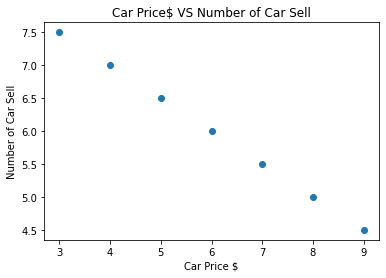

In [17]:
# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

* We have a question that is <b>what will be number of car sell if the car price is 100$</b>
* In order to solve this question we need to use <b>linear regression.</b>
* We need to line fit into this data. Aim is fitting line with minimum error.
* Steps of Linear Regression
    1. create LinearRegression class
    2. define model from this LinearRegression class
    3. MSE: Mean squared error
    4. Optimization (SGD:stochastic gradient descent)
    5. Backpropagation
    6. Prediction
* Lets implement it with Pytorch

In [19]:
# Linear Regression with Pytorch

# libraries
import torch      
from torch.autograd import Variable     
import torch.nn as nn 
import warnings
warnings.filterwarnings("ignore")

In [20]:
# create class
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        # super function. It inherits from nn.Module and we can access everythink in nn.Module
        super(LinearRegression,self).__init__()
        # Linear function.
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self,x):
        return self.linear(x)

In [22]:
# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim) # input and output size are 1

# MSE
mse = nn.MSELoss()
# Optimization (find parameters that minimize error)
learning_rate = 0.02   # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [23]:
# train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(car_price_tensor)
    
    # Calculate Loss
    loss = mse(results, number_of_car_sell_tensor)
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))


epoch 0, loss 22.48154640197754
epoch 50, loss 5.824771881103516
epoch 100, loss 3.9360413551330566
epoch 150, loss 2.659747362136841
epoch 200, loss 1.7973026037216187
epoch 250, loss 1.214512825012207
epoch 300, loss 0.8206967711448669
epoch 350, loss 0.5545790791511536
epoch 400, loss 0.3747527301311493
epoch 450, loss 0.2532358169555664
epoch 500, loss 0.17112192511558533
epoch 550, loss 0.11563421040773392
epoch 600, loss 0.07813936471939087
epoch 650, loss 0.052802328020334244
epoch 700, loss 0.03568091243505478
epoch 750, loss 0.024111179634928703
epoch 800, loss 0.016292711719870567
epoch 850, loss 0.011009693145751953
epoch 900, loss 0.007439746521413326
epoch 950, loss 0.005027403123676777
epoch 1000, loss 0.0033972386736422777


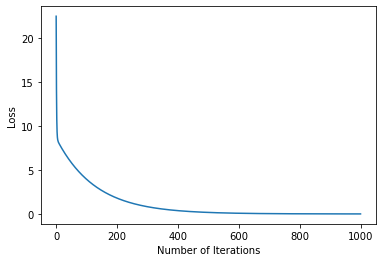

In [24]:
plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

* Number of iteration is 1001.
* Loss is almost zero that you can see from plot or loss in epoch number 1000.
* Now we have a trained model.
* While usign trained model, lets predict car prices.

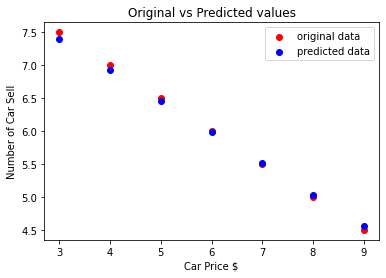

In [26]:
# predict our car price 
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")

# predict if car price is 10$, what will be the number of car sell
#predicted_10 = model(torch.from_numpy(np.array([10]))).data.numpy()
#plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()